# Homework 2: Bayesian Machine Learning

## Question 1: Beyond MAP Estimation

Suppose we have a regression model 
$$
y_i = x_i^T w + \epsilon
$$
with $\epsilon \sim N(\epsilon ; 0, \sigma^2)$, $\sigma^2$ is known, and let $p(w) = N(w ; 0, \tau^2I)$ be the prior distribution of $w$.

### Part a: Find the posterior distribution of $w$

Assume that we have observed dataset $\mathcal{D} = \{(x_i, y_i\}_{i=1}^{n}$ and thus $X \in \mathbb{R}^{n \times d}$ is our design matrix with each row reflecting one of our $d$ dimensional observations, $x_i$. Note that we can write the model in matrix form as
$$
y = Xw + \epsilon
$$
with $\epsilon \sim N(\epsilon ; 0, \sigma^2I)$. Hint: Look up "completing the square"

**Answer Here**

From the previous homework we arrived at the log posterior distribution for w up to some constant. We note that this is a normal distribution and are left with specifying the parameters of said distribution. With our new information around the distribution of the prior we can now write, 
$$\log(P(\mathbf{w}|\mathcal{D}))\propto -\frac{1}{2}(\mathbf{y} - \mathbf{Xw})^T(\sigma^2\mathbf{I}^{-1})(\mathbf{y} - \mathbf{Xw})-\frac{1}{2}\mathbf{w}^T(\tau^2\mathbf{I})^{-1}\mathbf{w}$$
$$\log(P(\mathbf{w}|\mathcal{D}))\propto -\frac{1}{2}\mathbf{y}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y} + \mathbf{y}(\sigma^2\mathbf{I})^{-1}\mathbf{Xw} - \frac{1}{2}\mathbf{w^TX^T}(\sigma^2I)^{-1}\mathbf{Xw}-\frac{1}{2}\mathbf{w}^T(\tau^2\mathbf{I})^{-1}\mathbf{w}$$
We can drop the terms depending only on y, and collect the linear terms in w, 
$$\log(P(\mathbf{w}|\mathcal{D}))\propto -\frac{1}{2}\mathbf{w}^T(\mathbf{X^T}(\sigma^2\mathbf{I})^{-1}\mathbf{X}+(\tau^2\mathbf{I})^{-1}) \mathbf{w}+ \mathbf{w}^T\mathbf{X}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y}$$
Here we can note that for a general gaussian, 
$$\log(P(\mathbf{x}|\mu, \Sigma))\propto -\frac{1}{2}\mathbf{x}^T\Sigma^{-1}\mathbf{x}+\mathbf{x}^T\Sigma^{-1}\mu$$
Equating these two expressions we can see that the inverse covariance matrix of our posterior is
$$S^{-1} = (\mathbf{X^T}(\sigma^2\mathbf{I})^{-1}\mathbf{X}+(\tau^2\mathbf{I})^{-1}) $$
We can now find $\mu$ by solivng the equation,
$$S^{-1}\mathbf{\mu} = \mathbf{X}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y}$$
Again this coming from the above equating with the general multivariate gaussian and giving us, 
$$\mathbf{\mu} = S\mathbf{X}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y}$$

So, 
$$\mathbf{w}|\mathbf{D}\sim N(\mathbf{\mu}, S)$$
Where S and $\mu$ are as specified above.

### Part b: Find the posterior predictive distribution

That is, for some test inputs $X^*$, we want to find the distribution $p(y_* | X_*, \mathcal{D}, \sigma^2, \tau^2)$ (note this distribution does _not_ depend on $w$).

**Answer Here**

$$p(y_* | X_*, \mathcal{D}, \sigma^2, \tau^2) = \int_{w} P(\mathbf{y_*(X_*)}|\mathbf{w})P(\mathbf{w}|\mathcal{D})d\mathbf{w}$$
The integrand here is simply $P(\mathbf{y_*(X_*), w}|\mathcal{D})$ the joint distribution of the new test predictions and the paramater given the data. We define a new random variable $\mathbf{z} = \begin{pmatrix} \mathbf{w} \\\mathbf{y_*} \end{pmatrix}$ this being the vector form of the joint density where $\mathbf{y_*} \sim N(\mathbf{X_*w})$ and w is as defined above. Note the dependence on w for y. 
$$\log(P(\mathbf{z})) = \log(P(\mathbf{y_*})) + \log(P(\mathbf{w}))$$
$$\log(P(\mathbf{z})) \propto -\frac{1}{2}(\mathbf{y_*}- \mathbf{X_*w})^T(\sigma^2\mathbf{I})^{-1}(\mathbf{y_*}- \mathbf{X_*w})-\frac{1}{2}(\mathbf{w}-\mathbf{\mu})^T(S)^{-1}(\mathbf{w}-\mathbf{\mu})
$$
$$\log(P(\mathbf{z})) \propto  - \frac{1}{2}\mathbf{y_*}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y_*} - \frac{1}{2}\mathbf{w}^T(\mathbf{X_*}^T(\sigma^2\mathbf{I})^{-1}\mathbf{X_*}+ S^{-1})\mathbf{w}+\frac{1}{2}\mathbf{y_*}^T(\sigma^2\mathbf{I})^{-1}\mathbf{X_*w} + \frac{1}{2}\mathbf{w}^T\mathbf{X_*}^T(\sigma^2\mathbf{I})^{-1}\mathbf{y_*} + \mathbf{w}^TS^{-1}\mu - \frac{1}{2}\mu S^{-1}\mu^T$$
The last term does not depend on $y_*$ or w and can be dropped from further derivations. 
The quadratic terms from the RHS can be written in matrix notation as, 
$$-\frac{1}{2}\begin{pmatrix}\mathbf{w}\\\mathbf{y_*}\end{pmatrix}^T\begin{pmatrix} \mathbf{X_*}^T(\sigma^2\mathbf{I})^{-1}\mathbf{X_*}+ S^{-1} & -\mathbf{X_*}^T(\sigma^2\mathbf{I})^{-1} \\ -(\sigma^2\mathbf{I})^{-1}\mathbf{X_*} & (\sigma^2\mathbf{I})^{-1}\end{pmatrix} \begin{pmatrix}\mathbf{w}\\\mathbf{y_*}\end{pmatrix}$$
The matrix here is the inverse covariance matrix of the joint distribution. We can obtain the covariance through a matrix inversion formula. The covariance matrix is then, 

$$\Sigma = \begin{pmatrix}S & SX_*^T\\X_*S & \sigma^2\mathbf{I}+X_*SX_*^T\end{pmatrix}$$
 
Collecting the linear terms of the joint distribution these can be written in matrix form as, 
$$\begin{pmatrix}\mathbf{w}\\\mathbf{y_*}\end{pmatrix}^T\begin{pmatrix}S^{-1}\mu\\0\end{pmatrix}$$
As in the previous problem the mean of z is given by the covariance matrix times the linear terms,
$$\mathbb{E}[\mathbf{z}]=\Sigma\begin{pmatrix}S^{-1}\mu\\0\end{pmatrix}= \begin{pmatrix}\mu \\ \mathbf{X_*} \mu\end{pmatrix}$$
These being the partitioned gaussian representation of a joint gaussian we can use the entries of the covariance and mean matrices to compute the distribution of y|D. Here the $\Sigma_{2,2}$ and $\mathbb{E}[\mathbf{z}]_{2} $ will correspond to the co-variance matrix and the mean of $y_*$, respectively.
$$\mathbf{y_*} | \mathcal{D} \sim N(\mathbf{X_*\mu}, \sigma^2\mathbf{I}+\mathbf{X_*}S\mathbf{X_*}^T)$$

### Part c: Gaining some intuition

Here we're going to code up our results and look at a few plots to try to gain some intuition about what's happening in Bayesian linear regression for a simple case;
$$
y = w_0 + w_1 x + w_2x^2 + \epsilon \qquad \epsilon \sim N(0, \sigma^2).
$$

#### I: Use the following cell to define $\sigma$, $\tau$, and define some data and compute the posterior distribution over $w$

Compute this posterior mean and covariance explicity using numpy, i.e. do not use an external package's implementation of Bayesian linear regression for this.

Pointer: `scipy.stats.multivariate_normal` will be a helpful function for this, all you'll need to do is compute your posterior mean vector and covariance matrix and then plug those into the `scipy` module.

In [31]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal

**Answer Here**

In [32]:
sig = 1.
tau = 5.
x = np.array([-4. , -2.6666, -1.3333,  0.,  1.3333, 2.6666,  4.])
y = np.array([ 8.9437,  6.3286,  2.6544,  1.1590,  2.4898,
       -1.3645, -1.5733])
nx = len(x)
y_2d = y.reshape(-1,1)
X = np.stack((np.ones(nx), x, x**2), -1)# and this makes your design matrix X
cov = np.linalg.inv((1/sig**2)*(X.T@X) + (1/tau**2) * np.identity(X.shape[1]))
mu = cov @ ((1/sig**2)*X.T@y_2d)
posterior = multivariate_normal(mean= mu.ravel(), cov=cov)

In [54]:
print(posterior.mean.shape), print(posterior.cov.shape)
post_w0 = norm(posterior.mean[0], np.sqrt(posterior.cov[0, 0]))
prior_w0 = norm(0, tau)

(3,)
(3, 3)


#### II: Plot the prior and posterior distributions of just $w_0$ over a domain of [-2, 6].

Your posterior should be much more concentrated around a single value than the prior.

A couple hints: 

- If you have a variable `dist` that is an instance of a `scipy.stats.multivariate_normal` module, then `dist.pdf(domain)` will give you the PDF of your distribution evaluated at the points in an array `domain`
- The marginal distribution of $w_0$ is easy to compute, see pages 89-90 of 
    [Bishop's Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf).

In [56]:
import matplotlib.pyplot as plt

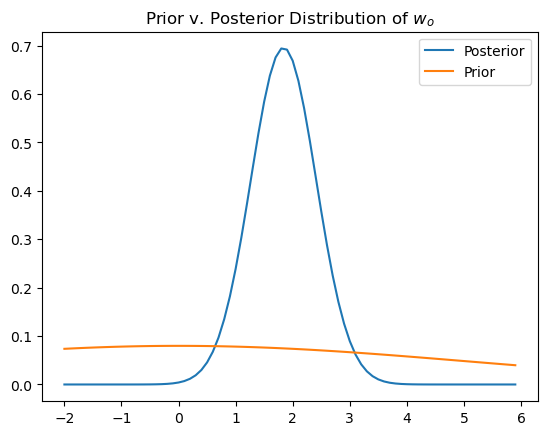

In [58]:
plt.title(r"Prior v. Posterior Distribution of $w_o$")
plt.plot(np.arange(-2,6,.1), post_w0.pdf(np.arange(-2,6,.1)), label="Posterior")
plt.plot(np.arange(-2,6, .1), prior_w0.pdf(np.arange(-2,6,.1)), label="Prior")
plt.legend()
plt.show()

**Answer Here**

#### III: Visualizing functions sampled from the posterior

Define a set of test points, $x_*$, evenly spaced in $[-10, 10]$. Sample $20$ vectors $w$ from your posterior distribution and plot the corresponding predictions, $y_*$ for each sampled $w$. Also include the training points and the MAP prediction $y_{map}$ on the plot.

**Answer Here**

In [59]:
x_test=np.linspace(-10,10,20)
params = [posterior.rvs() for i in range(20)]
X_test = np.stack((np.ones(len(x_test)), x_test, x_test**2), -1)
preds = [X_test@w for w in params]

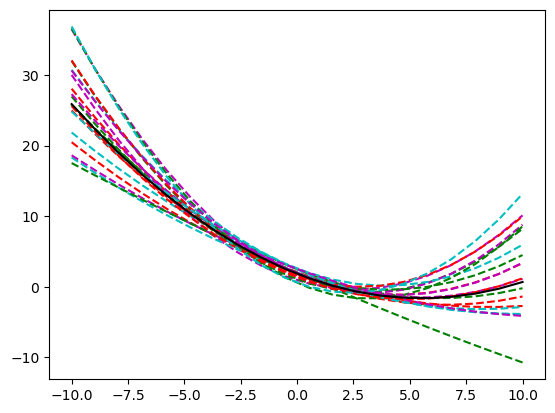

In [60]:
for i, color in zip(range(20),(['g--', 'r--', 'c--', 'm--']*5)):
    plt.plot(x_test, preds[i], color)
plt.plot(x_test,X_test@mu, 'k-')
plt.show()

#### IV: Plotting the Posterior Predictive

The previous plot should give us a sense of the posterior predictive distribution, which is essentially an average over the predictions sampled from the posterior. Now define the posterior predictive distribution from part b over your test points $x_*$ and use the `matplotlib` `fill_between` function to shade the mean plus or minus two standard deviations at each test point.

**Answer Here**

In [61]:
post_mu = X_test @ mu
post_cov = (sig**2)*np.identity(X_test.shape[0]) + X_test@cov@X_test.T
post_pred = multivariate_normal(mean=post_mu.ravel(), cov=post_cov)

In [62]:
post_cov.shape

(20, 20)

In [63]:
sd_up = [(post_mu[i] + 2*np.sqrt(post_cov[i,i]))[0] for i in range(20)]
sd_down = [(post_mu[i] - 2*np.sqrt(post_cov[i,i]))[0] for i in range(20)]

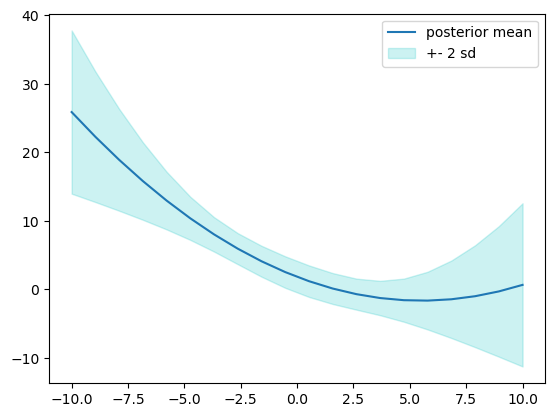

In [64]:
plt.plot(x_test, post_mu, label='posterior mean')
plt.fill_between(x_test,sd_up, sd_down, color='c', alpha=.2, label='+- 2 sd')
plt.legend()
plt.show()

#### V: Observing New Data

Now suppose we observe a new datapoint at $(-9, 18)$. Generate the plot of the new posterior predictive distribution. What happens to your uncertainty near $x=-9$?

In [65]:
sig = 1.
tau = 5.

x = np.array([-4. , -2.6666, -1.3333,  0.,  1.3333, 2.6666,  4., -9])
y = np.array([ 8.9437,  6.3286,  2.6544,  1.1590,  2.4898, -1.3645, -1.5733, 18])

nx = len(x)
X = np.stack((np.ones(nx), x, x**2), -1) # and this makes your design matrix X
p_y_2d = y.reshape(-1,1)
X = np.stack((np.ones(nx), x, x**2), -1)# and this makes your design matrix X
p_cov = np.linalg.inv((1/sig**2)*(X.T@X) + (1/tau**2) * np.identity(X.shape[1]))
p_mu = p_cov @ ((1/sig**2)*X.T@p_y_2d)
p_posterior = multivariate_normal(mean= p_mu.ravel(), cov=p_cov)
p_post_mu = X_test @ p_mu
p_post_cov = (sig**2)*np.identity(X_test.shape[0]) + X_test@p_cov@X_test.T
p_post_pred = multivariate_normal(mean=p_post_mu.ravel(), cov=p_post_cov)

In [66]:
p_sd_up = [(p_post_mu[i] + 2*np.sqrt(p_post_cov[i,i]))[0] for i in range(20)]
p_sd_down = [(p_post_mu[i] - 2*np.sqrt(p_post_cov[i,i]))[0] for i in range(20)]

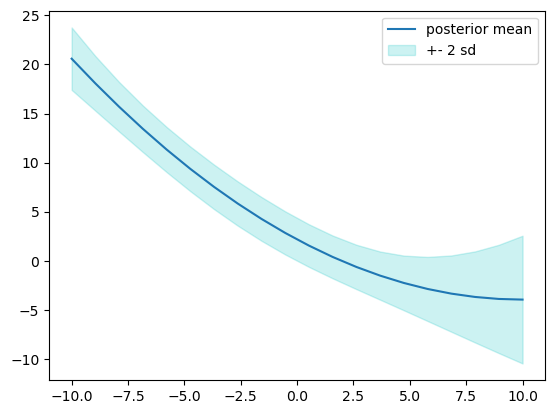

In [67]:
plt.plot(x_test, p_post_mu, label='posterior mean')
plt.fill_between(x_test,p_sd_up, p_sd_down, color='c', alpha=.2, label='+- 2 sd')
plt.legend()
plt.show()

**Answer Here**

The uncertainty around the new data point diminishes rather significantly.

#### VI: Thinking About Uncertainty

Last homework we showed that the MAP estimate is equivalent to frequentist regression with a ridge penalty. Plot the predictive distribution for this case with shade representing our uncertainty. This is just $y_{map}\pm 2\sigma$. Comment on the difference in uncertainty between this and the plot from part IV as you move away from the observed data.

**Answer Here**

In [68]:
sd_up = [(mu + sig)[0] for mu in post_mu]
sd_down = [(mu - sig)[0] for mu in post_mu]

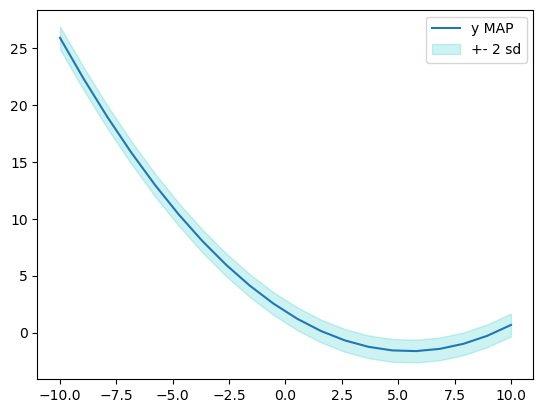

In [69]:
plt.plot(x_test, post_mu, label="y MAP")
plt.fill_between(x_test, sd_up, sd_down, color='c', alpha=.2, label="+- 2 sd")
plt.legend()
plt.show()

Commentary:
When we are looking at the MAP estimate all of our uncertainty is coming from the noise we assume on the model. This provides us with unrealistic levels of confidence as we move away from observed data in comparison with a pure bayesian approach.

## Question 2: Posterior Variance Reduction

Consider a general Bayesian inference problem over parameters $\theta$ to explain the dataset $\mathcal{D}$, such that their joint probabilistic distribution is defined as $p(\mathcal{D},\theta)$. 

Show that the prior mean is equal to the posterior mean averaged over the data generating distribution $p(\mathcal{D})$, i.e..

$$
\mathbb{E}_{\theta}[\theta] = \mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\theta}\left[ \theta \mid \mathcal{D} \right]\right]
$$

Further, show that on average, the posterior variance of $\theta$ is smaller than the prior variance, i.e.

$$
\mathrm{var}_\theta[\theta] = \mathbb{E}_{\mathcal{D}}[\mathrm{var}_{\theta}[\theta\mid\mathcal{D}]] + \mathrm{var}_{\mathcal{D}}[\mathbb{E}_\theta[\theta\mid\mathcal{D}]]
$$

**Hint**: It may be helpful to first prove this by considering $\theta$ and $\mathcal{D}$ as scalar values.


**Answer Here**

$$ \mathbb{E}_{\mathcal{D}}\left[\mathbb{E}_{\theta}\left[ \theta \mid \mathcal{D} \right]\right] = \int \int \theta \frac{f(\theta, \mathcal{D})}{f(\mathcal{D})}f(\mathcal{D})d\theta d\mathcal{D}= \int \int \theta f(\theta, \mathcal{D})d\theta d\mathcal{D}= \int \mathbb{E}[\theta| \mathcal{D}]d\mathcal{D}=\mathbb{E}[\theta]$$

$$\mathbb{E}_{\mathcal{D}}[\mathrm{var}_{\theta}[\theta\mid\mathcal{D}]] + \mathrm{var}_{\mathcal{D}}[\mathbb{E}_\theta[\theta\mid\mathcal{D}]] = \mathbb{E}_\mathcal{D}[\mathbb{E}_{\theta}[\theta^2|\mathcal{D}]] - \mathbb{E}_\mathcal{D}[\mathbb{E}_\theta[\theta|\mathcal{D}]^2 ] + \mathbb{E}_\mathcal{D}[\mathbb{E}_\theta [\theta|\mathcal{D}]^2] - \mathbb{E}_\mathcal{D}[\mathbb{E}_\mathcal{\theta}[\theta|\mathcal{D}]]^2=\mathbb{E}_\mathcal{D}[\mathbb{E}_{\theta}[\theta^2|\mathcal{D}]] - \mathbb{E}_\mathcal{D}[\mathbb{E}_\mathcal{\theta}[\theta|\mathcal{D}]]^2= \mathbb{E}_\theta[\theta^2]-\mathbb{E}_\theta[\theta]^2 = \mathrm{var}_\theta(\theta)$$


## Question 3: Bayesian Model Averaging

Show that the Bayesian model average always has lower expected loss than that of a single model. Let $\Delta$ be the quantity we want to predict, $\mathcal{D}$ be the observed data, and $\mathcal{M}$ be a finite set of models. Our loss function is $\mathcal{L}(\Delta, p) = -\log p(\Delta)$ where $p$ is our probabilistic prediction.

We can predict using Bayesian Model Averaging (BMA) 
$$
p_{BMA}(\Delta) = \sum_{m \in \mathcal{M}}p(\Delta | m, \mathcal{D}) p(m | \mathcal{D})
$$
or using a single model
$$
p_{m}(\Delta) = p(\Delta | m, \mathcal{D}).
$$

Show that for any model $m \in \mathcal{M}$ 
$$
\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right],
$$
where the expectation is with respect to $\Delta$.

**Hint**: Use the non-negativity of the KL divergence.

**Answer Here**

$$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right] \Rightarrow 0 \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right] - \mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] = \mathbb{E}[ \mathcal{L}(\Delta, p_{m}) -  \mathcal{L}(\Delta, p_{bma})] = \mathbb{E}[\log(\frac{p_{bma}(\Delta)}{p_{m}(\Delta)})]$$
For the BMA we have,
$$\sum_{m \in \mathcal{M}}p(\Delta | m, \mathcal{D}) p(m | \mathcal{D}) = p(\Delta|\mathcal{D})$$
and we are taking the expectation with respect to $\Delta$ which depends on $\mathcal{D}$, the right most expectation can be written,
$$\int p(\Delta|\mathcal{D}) \log\frac{p(\Delta|\mathcal{D})}{p(\Delta|m, \mathcal{D})}d\Delta$$
Which is the$D_{KL}(p_{bma}||p_m)$ and therefore postive. So we conclude that ,
$$\mathbb{E}\left[ \mathcal{L}(\Delta, p_{bma})\right] \leq \mathbb{E}\left[ \mathcal{L}(\Delta, p_{m})\right],$$


## Question 4: Bayesian Logistic Regression

In this section, we will develop logistic regression, and analyze it on a toy dataset.

### Part A: Derviations

#### I. Logistic function

The logistic function $\sigma(x)$ is defined as 

$$
\sigma(x) = \frac{1}{1 + \exp{\{-x\}}}
$$

Show that $\sigma(-x) = 1 - \sigma(x)$.

$$1 - \sigma(x) = 1 - \frac{1}{1 + \exp{\{-x\}}} = \frac{1 + \exp{\{-x\} - 1}}{1 + \exp{\{-x\}}} = \frac{\exp{\{-x\}}}{1 + \exp{\{-x\}}}= \frac{\exp{\{-x\}}}{\exp{\{-x\}}(\frac{1}{\exp{\{-x\}}} + 1)} = \frac{1}{1 + \exp{\{x\}}} = \sigma(-x)$$

#### II. Cross-Entropy Loss

Consider the problem of binary classification where every input $x$ is assigned to a class $y$, either a 0 or a 1, i.e. We define the Bernoulli likelihood parametrized by parameters $w$ as,

$$
p(y = 1\mid w, x) = \mathrm{Bern}(\sigma(w^Tx))
$$

where $\mathrm{Bern}$ is the Bernoulli distribution. Show that maximizing this likelihood is equivalent to minimizing the **cross-entropy loss** where for every input $x$, $y$ is the true output and $p(y \mid w,x)$ is the predicted output probability,

$$
\mathcal{L}(w) = \sum_{i=1}^n \ell(y_i \mid x_i; w) = - \sum_{i=1}^n\sum_{k=0}^1 \mathbb{1}[y_i=k]\log{p(y_i=k \mid w,x_i)}
$$

First note that, $$- \sum_{i=1}^n\sum_{k=0}^1 \mathbb{1}[y_i=k]\log{p(y_i =k\mid w,x_i)}=- \sum_{i=1}^n y_i\log(\sigma(w^Tx)) + (1-y_i)\log(\sigma(-w^Tx))$$
Then, because we have a sequence of Bernoullis with Probability $\sigma(w^Tx)$ of being 1, we can write the likelihood. 
$$\mathcal{L}(w) = \prod_{i=1}^n \sigma(w^Tx)^{y_i} \sigma(-w^Tx)^{1-y_i}$$
Taking the log of the likelihood, 
$$\log(\mathcal{L}(w)) = \sum_{i=1}^n y_i\log(\sigma(w^Tx)) + (1-y_i)\log(\sigma(-w^Tx))$$
This simply being the negative of the cross-entropy for two classes we can conclude that minimizing the cross-entropy is equivalent to maximizing the likelihood.

#### III. The Logistic Regression Model

Write down the likelihood and log posterior (up to a constant in $w$) for the logistic regression model:
$$
p(y_i = 1 | w, x_i) = \sigma(w^Tx) = \frac{1}{1 + \exp(-w^T x_i)}
$$
for dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^{N}$ where $x_i \in \mathbb{R}^{d \times 1}$. Assume a Gaussian prior on $w$, $p(w) = N(0, \gamma^2 I)$.

$$
p(y | w, x) = \prod_{i=1}^{N}\sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{(1-y_i)}
$$
and
$$
\log p(w | \mathcal{D}) \propto -\frac{1}{\gamma^2}w^T w + \sum_{i=1}^{N}y_i \log \sigma(w^Tx_i) + (1-y_i)\log \sigma(-w^Tx_i)
$$

### Part C: Implementation

Here we'll generate a few plots using a 2D logistic regression example. Use the data in `logistic_regression.npz` for this question.

#### I: Implement a function to compute the negative log likelihood, and use an optimizer (such as scipy's `minimize` function) to find an estimate of $w_{map}$. 
Assume your prior is $p(w) = N(0, 25I)$. 

**Answer Here**

In [70]:
from scipy.optimize import minimize
from scipy.special import expit

In [72]:
train_data = np.load('logistic_regression.npz', allow_pickle=True)

In [73]:
X = train_data['X']
Y = train_data['Y'].reshape(-1,1)

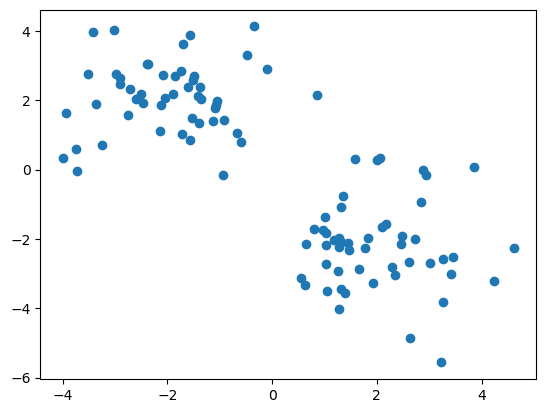

In [74]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [75]:
def nll_objective(param):
    return np.sum([(1/50)*param.T@param -y*np.log(expit(x.T@param)) -(1-y)*np.log(expit(-x.T@param)) for x, y in zip(X, Y)])

In [76]:
output = minimize(nll_objective, x0=[1,1], bounds=((-7, 7),(-7,7)))
output

      fun: 7.834129179146139
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.55271370e-07,  1.77635685e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([ 1.05376224, -1.01022382])

In [77]:
min_x = output['x']
fun_min = output['fun']

#### II: Now make a contour plot representing your the MAP prediction over a surface for $x_1 \in [-7, 7]$ and $x_2 \in [-7, 7]$. Include the provided training data in this plot.

You may want to employ numpy's `meshgrid` function to create the surface.

**Answer Here**

In [78]:
def nll_objective_grid(x1_grid, x2_grid):
    nlls = np.ndarray((x1_grid.shape[0], x2_grid.shape[1]))
    for i in range(x1_grid.shape[0]):
        for j in range(x1_grid.shape[1]):
            param = np.array([x1_grid[i,j], x2_grid[i,j]])
            nlls[i, j] = nll_objective(param)
    return nlls

In [79]:
x1 = np.linspace(-7, 7, 100)
x2 = np.linspace(-7,7,100)
x1_grid, x2_grid = np.meshgrid(x1, x2)

In [80]:
nlls = nll_objective_grid(x1_grid, x2_grid)

In [81]:
nlls.shape

(100, 100)

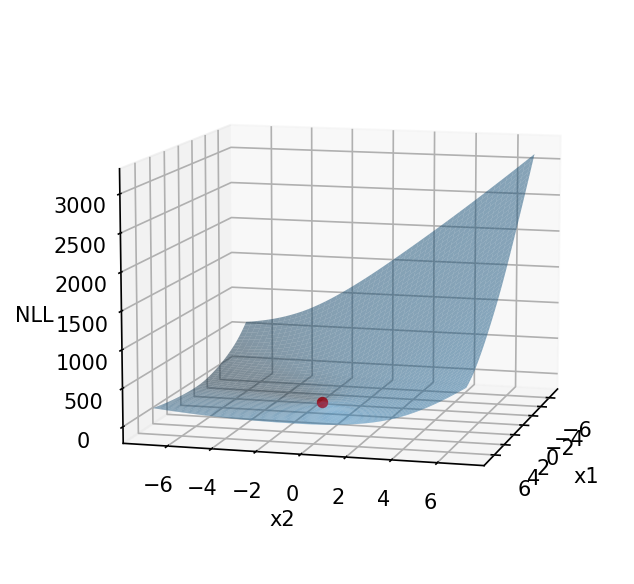

In [82]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, nlls, alpha=0.5)
ax.scatter(min_x[0], min_x[1], fun_min, color='red')
ax.set_xlabel(r'x1')
ax.set_ylabel(r'x2')
ax.set_zlabel('NLL')
ax.view_init(10, 15)
plt.show()

In [83]:
def map_prediction(param):
    return expit(min_x.T@param)

In [84]:
def map_grid(x1_grid, x2_grid):
    map_pred = np.ndarray((x1_grid.shape[0], x2_grid.shape[1]))
    for i in range(x1_grid.shape[0]):
        for j in range(x1_grid.shape[1]):
            param = np.array([x1_grid[i,j], x2_grid[i,j]])
            map_pred[i, j] = map_prediction(param)
    return map_pred

In [85]:
map_preds = map_grid(x1_grid, x2_grid)

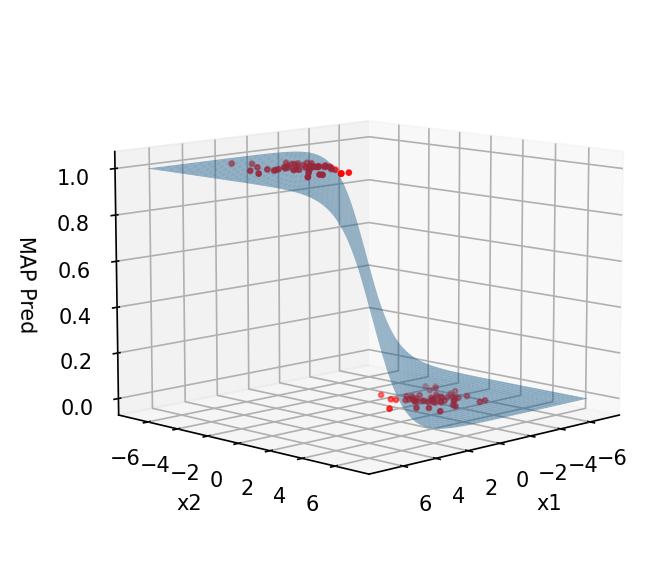

In [86]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, map_preds, alpha=0.5)
ax.scatter(X[:,0], X[:,1], Y, color='red', s=5)
ax.set_xlabel(r'x1')
ax.set_ylabel(r'x2')
ax.set_zlabel('MAP Pred')
ax.view_init(10, 45)
plt.show()

### Optional Bonus Questions:

The posterior predictive for test point $x_*$,
$$
\int_{w}\sigma(w^Tx_*)p(w | \mathcal{D}) dw
$$
is not tractable for this model, so we will need to perform some sort of approximation. The Laplace approximation models an unnormalized probability density as a Gaussian (please read page 341 here http://www.inference.org.uk/itprnn/book.pdf). 

Derive the Laplace approximation around the MAP estimate, $w_{map}$, to the posterior you found in part A.

**Answer Here**

Since we have obtained a numerical estimate for the w_map we just need to compute the covariance matrix of the posterior. This is accomplished using the method of laplace approximation. The covariance matrix in this case will just be the hessian of the log of the posterior p(w|D), 

$$ - \nabla \nabla\log(p(w|\mathcal{D})) =  \nabla \nabla [-y\log\sigma(w^Tx_*) -(1-y)\log\sigma(-w^Tx_*)) + \frac{1}{50}w^Tw)]$$
$$-\nabla\log(p(w|\mathcal(D))) = \frac{1}{25}w^T - y\log\sigma(-w^Tx_*)x_* + (1-y)\log\sigma(w^Tx_*)x_* )$$
$$- \nabla \nabla\log(p(w|\mathcal(D)) = \frac{1}{25} + y\sigma(-w^Tx_*)\sigma(w^Tx_*)x_*x_*^T +(1-y)\sigma(-w^Tx_*)\sigma(w^Tx_*) x_*x_*^T$$
$$S = \sigma(-w^Tx_*)\sigma(w^Tx_*) x_*x_*^T + \frac{1}{25}$$
Thus we have our covariance matrix of the approximation of the posterior distribution of w. So, 
$$w|\mathcal{D} \sim N(w_{map}, S)$$



### Now compute the Hessian according to your formula from part B and construct an approximation to the posterior predictive over your surface of $x_1$ and $x_2$ values from above.

You can approximate the posterior predictive by sampling $50$ sets of parameters from your laplace approximation and averaging your predictions from each sampled parameter set. Formally, let $x_* \in \mathbb{R}^{N_* \times 2}$ be your set of test points, then your predictions are

$$
y_* = \sum_{i=1}^{50} \sigma(w_i^T x_*) \textrm{ where } w_i \sim N(w_{map}, H^{-1}).
$$

Which surface looks more reasonable? The MAP estimated surface or the approximated posterior predictive? 

**Answer Here**

In [87]:
w_map = min_x

In [88]:
w_col = w_map.reshape(-1, 1)

In [89]:
A = 1/25 + expit(w_col.T@X.T)*expit(-w_col.T@X.T)*X.T@X 


In [95]:
post_w = multivariate_normal(mean =w_map, cov=np.linalg.inv(A) )
samples = post_w.rvs(size=50)

In [96]:
def prediction(param):
    return (1/50) *np.sum([expit(w.T@param) for w in samples])


In [97]:
def prediction_surface(x1_grid, x2_grid):
    preds = np.ndarray((x1_grid.shape[0], x2_grid.shape[1]))
    for i in range(x1_grid.shape[0]):
        for j in range(x1_grid.shape[1]):
            param = np.array([x1_grid[i,j], x2_grid[i,j]])
            preds[i, j] = prediction(param)
    return preds

In [98]:
surf = prediction_surface(x1_grid, x2_grid)

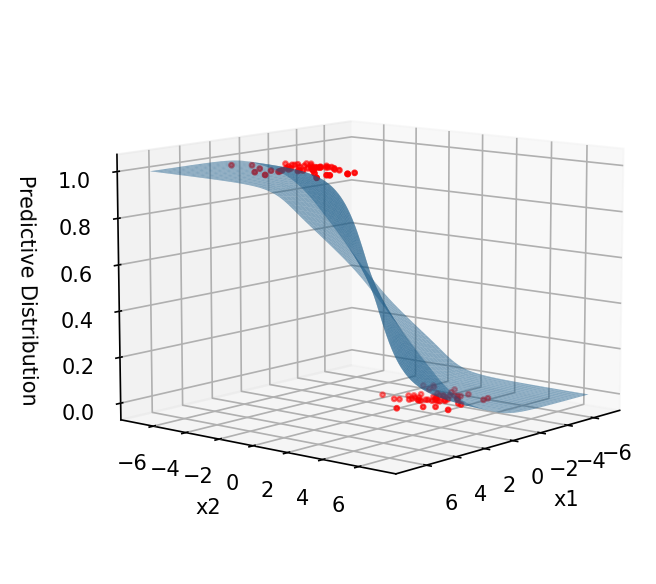

In [100]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(x1_grid, x2_grid, surf, alpha=0.5)
ax.scatter(X[:,0], X[:,1], Y, color='red', s=5)
ax.set_xlabel(r'x1')
ax.set_ylabel(r'x2')
ax.set_zlabel('Predictive Distribution')
ax.view_init(10, 40)
plt.show()

The fit to the data here is not as strong as it was in the MAP prediction. Not necessarily a bad thing depending on the properties we want from our predictions. This will also give us a full posterior predictive distribution as opposed to a single regularized prediction surface.